In [59]:
## Import
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import h5py
import pandas as pd

In [222]:
with h5py.File('data/2016-04-21--14-48-08.h5', 'r') as hdf:
    ls = list(hdf.keys())
    print('List of dataset in this file', ls)
    data = hdf.get('velodyne_gps')
    car_accel = np.array(data)
    print('shape of car_accel: ', car_accel.shape)

List of dataset in this file ['UN_D_cam1_ptr', 'UN_D_cam2_ptr', 'UN_D_camphone_ptr', 'UN_D_lidar_ptr', 'UN_D_radar_msg', 'UN_D_rawgps', 'UN_T_cam1_ptr', 'UN_T_cam2_ptr', 'UN_T_camphone_ptr', 'UN_T_lidar_ptr', 'UN_T_radar_msg', 'UN_T_rawgps', 'blinker', 'brake', 'brake_computer', 'brake_user', 'cam1_ptr', 'cam2_ptr', 'camphone_ptr', 'car_accel', 'fiber_accel', 'fiber_compass', 'fiber_compass_x', 'fiber_compass_y', 'fiber_compass_z', 'fiber_gyro', 'fiber_temperature', 'gas', 'gear_choice', 'idx', 'rpm', 'rpm_post_torque', 'selfdrive', 'speed', 'speed_abs', 'speed_fl', 'speed_fr', 'speed_rl', 'speed_rr', 'standstill', 'steering_angle', 'steering_torque', 'times', 'velodyne_gps', 'velodyne_heading', 'velodyne_imu']
shape of car_accel:  (152650, 3)


In [212]:
car_accel[:101]

array([[ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224189e+04,  3.6000000e+00],
       [ 3.7457403e+03, -1.2224

In [31]:
# Connect to meta database
# connect database and create cursor here
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/comma-dataset_meta.sqlite')
c = conn.cursor()

c.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

,name
0,s3item_pending_changes
1,s3item_history
2,s3api_per_key_metadata


In [231]:
c.execute("""SELECT * FROM s3api_per_key_metadata;""")
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df

NameError: name 'c' is not defined

In [60]:
from models.data import *

In [232]:
df = load_dataset_as_dataframe('data/2016-04-21--14-48-08.h5')
df.head()

UN_D_cam1_ptr
UN_D_cam2_ptr
UN_D_camphone_ptr
UN_D_lidar_ptr
UN_D_radar_msg
UN_D_rawgps
UN_T_cam1_ptr
UN_T_cam2_ptr
UN_T_camphone_ptr
UN_T_lidar_ptr
UN_T_radar_msg
UN_T_rawgps
blinker
(152650,)
1
brake
(152650,)
1
brake_computer
(152650,)
1
brake_user
(152650,)
1
cam1_ptr
(152650,)
1
cam2_ptr
(152650,)
1
camphone_ptr
(152650,)
1
car_accel
(152650,)
1
fiber_accel
(152650, 3)
2
fiber_compass
(152650, 3)
2
fiber_compass_x
(152650,)
1
fiber_compass_y
(152650,)
1
fiber_compass_z
(152650,)
1
fiber_gyro
(152650, 3)
2
fiber_temperature
(152650,)
1
gas
(152650,)
1
gear_choice
(152650,)
1
idx
(152650,)
1
rpm
(152650,)
1
rpm_post_torque
(152650,)
1
selfdrive
(152650,)
1
speed
(152650,)
1
speed_abs
(152650,)
1
speed_fl
(152650,)
1
speed_fr
(152650,)
1
speed_rl
(152650,)
1
speed_rr
(152650,)
1
standstill
(152650,)
1
steering_angle
(152650,)
1
steering_torque
(152650,)
1
times
(152650,)
1
velodyne_gps
(152650, 3)
2
velodyne_heading
(152650, 2)
2
velodyne_imu
(152650, 12)
2


,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.475421,-0.181464,...,799.000000,4075.000000,4083.000000,114.000000,790.000000,15.000000,68.000000,144.000000,20.000000,8.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.479014,-0.189644,...,770.027548,4075.000000,4073.040720,117.621556,774.608385,10.473054,79.432335,146.000000,23.094611,7.094611
2,0.0,0.0,0.0,0.0,0.0,0.0,0.118651,0.0,0.474154,-0.165003,...,810.689515,4073.179604,4077.461189,118.910198,804.856938,13.640793,74.077621,145.089802,22.089802,7.910198
3,4.0,0.0,0.0,0.0,0.0,0.0,0.431230,0.0,0.472352,-0.152852,...,784.150766,4074.745230,4077.000000,116.000000,775.000000,13.000000,63.000000,145.000000,22.000000,6.000000
4,4.0,0.0,0.0,0.0,0.0,0.0,0.743808,0.0,0.462913,-0.141036,...,775.000000,4077.000000,4058.000000,118.000000,779.000000,6.000000,88.000000,144.000000,22.453502,6.907004


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
sample = df[:300000]

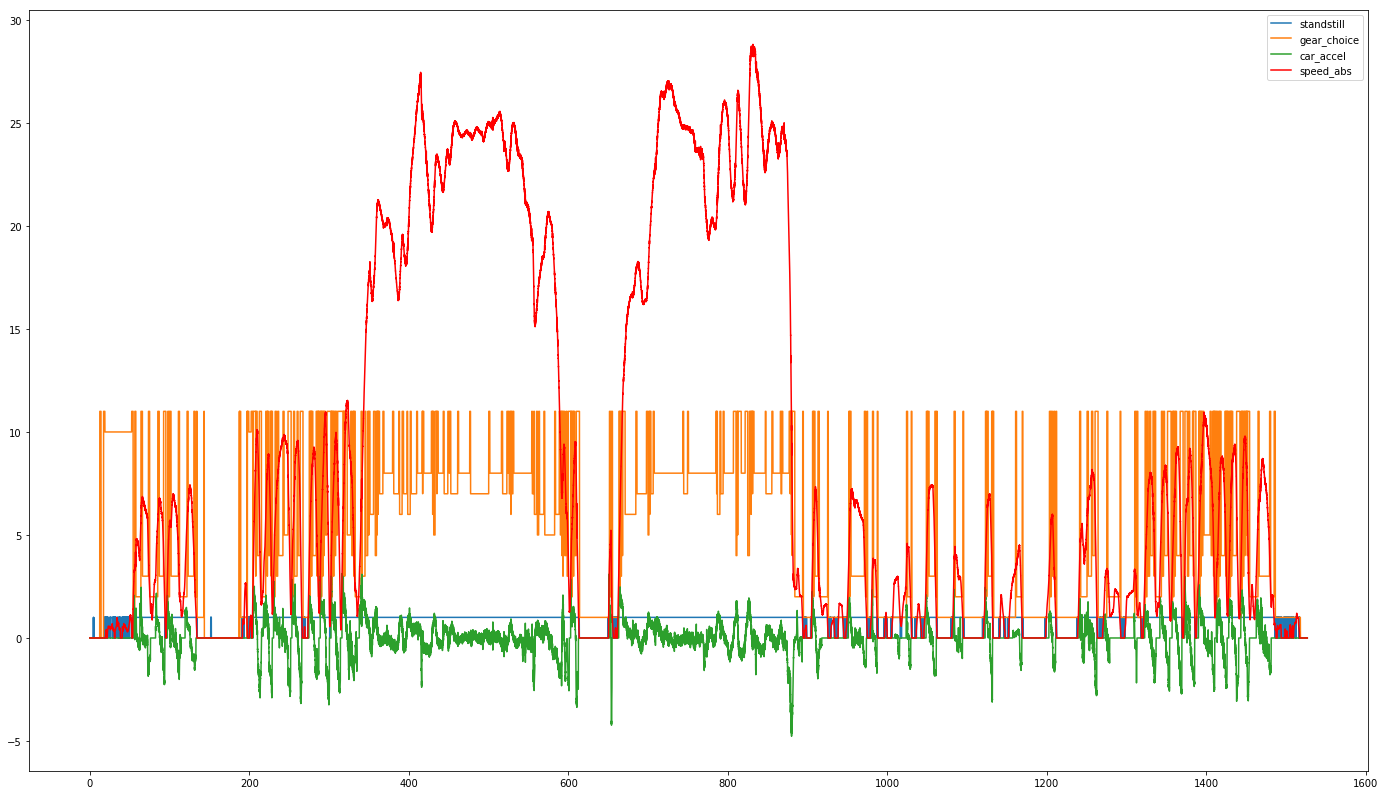

In [218]:
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times, sample.standstill)
plt.plot(sample.times, sample.gear_choice)
plt.plot(sample.times, sample.car_accel)
plt.plot(sample.times, sample.speed_abs, c='r')
plt.legend()

In [126]:
df.times = pd.to_datetime(df.times, format='%s')

ValueError: 's' is a bad directive in format '%s'

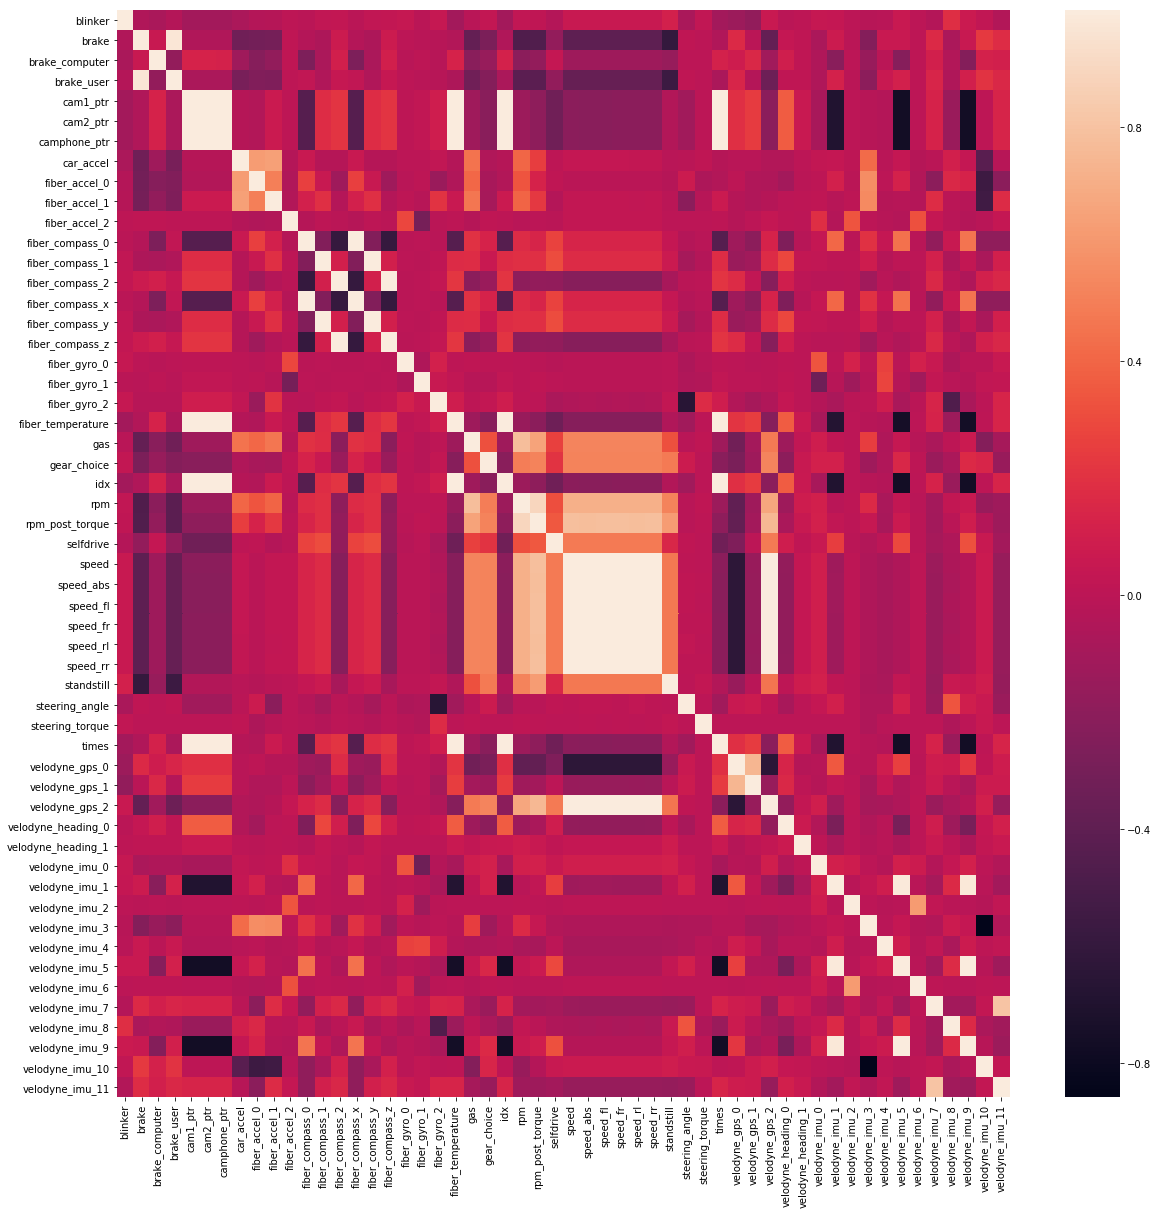

In [233]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [234]:
df.describe()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
count,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,...,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000
mean,6.750056,334.631547,42.549672,292.081876,15267.822692,15263.352257,22772.098800,-0.021006,0.347880,0.073085,...,791.590508,2648.786666,3248.286779,89.853978,785.715461,2622.346940,131.161414,117.259951,1399.422894,2717.659633
std,11.865961,574.526626,127.024387,582.237325,8816.092826,8812.799096,13147.861501,0.753241,0.789844,0.820005,...,92.955738,1762.932573,1462.562746,15.900711,97.968634,1778.760707,433.119131,16.106536,1748.419969,1751.530112
min,0.000000,-64.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,-4.767932,-6.995340,-7.204732,...,14.000000,0.000000,0.000000,67.181092,3.032728,0.000000,0.000000,93.284157,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,7633.000000,7631.000000,11385.833086,-0.133633,-0.060611,-0.261019,...,775.057144,194.936731,2984.809857,76.866891,769.000000,152.948102,70.227796,103.753251,54.712443,312.822983
50%,4.000000,0.000000,0.000000,0.000000,15268.000000,15263.500000,22772.194300,0.000000,0.360794,0.062531,...,791.497354,3941.999663,4074.000000,84.825126,785.660045,3990.541702,79.026304,112.272861,145.640377,4012.600483
75%,4.000000,456.721363,0.000000,246.301098,22903.000000,22895.000000,34158.372334,0.127648,0.815764,0.512484,...,806.534982,4039.076691,4083.584130,107.000000,801.495759,4069.710823,87.975381,135.000000,3870.675882,4069.543018
max,68.000000,3856.000000,614.000000,3856.000000,30537.000000,30527.000000,45544.000000,3.125285,10.553655,9.266323,...,4081.000000,4095.000000,4095.000000,122.007321,4094.000000,4095.000000,4095.000000,148.000000,4095.000000,4095.000000


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152650 entries, 0 to 152649
Data columns (total 54 columns):
blinker               152650 non-null float64
brake                 152650 non-null float64
brake_computer        152650 non-null float64
brake_user            152650 non-null float64
cam1_ptr              152650 non-null float64
cam2_ptr              152650 non-null float64
camphone_ptr          152650 non-null float64
car_accel             152650 non-null float64
fiber_accel_0         152650 non-null float64
fiber_accel_1         152650 non-null float64
fiber_accel_2         152650 non-null float64
fiber_compass_0       152650 non-null float64
fiber_compass_1       152650 non-null float64
fiber_compass_2       152650 non-null float64
fiber_compass_x       152650 non-null float64
fiber_compass_y       152650 non-null float64
fiber_compass_z       152650 non-null float64
fiber_gyro_0          152650 non-null float64
fiber_gyro_1          152650 non-null float64
fiber_gyro_2   

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = 